[View in Colaboratory](https://colab.research.google.com/github/UjjwalSaxena/Simple-eye-detection-tests-ML/blob/master/main.ipynb)

In [214]:
# !wget https://github.com/UjjwalSaxena/Simple-eye-detection-tests-ML/blob/master/dataset_B_Eye_Images.zip 
# ! git clone https://github.com/UjjwalSaxena/Simple-eye-detection-tests-ML
# ! wget https://upload.wikimedia.org/wikipedia/commons/thumb/b/b6/Image_created_with_a_mobile_phone.png/1200px-Image_created_with_a_mobile_phone.png
# !wget http://adas.cvc.uab.es/webfiles/datasets/CVC-11-DrivFace/DrivFace.zip

--2018-08-03 09:42:56--  http://adas.cvc.uab.es/webfiles/datasets/CVC-11-DrivFace/DrivFace.zip
Resolving adas.cvc.uab.es (adas.cvc.uab.es)... 158.109.8.54
Connecting to adas.cvc.uab.es (adas.cvc.uab.es)|158.109.8.54|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26269971 (25M) [application/zip]
Saving to: ‘DrivFace.zip’

DrivFace.zip        100%[===================>]  25.05M  1.85MB/s    in 32s     

2018-08-03 09:43:28 (794 KB/s) - ‘DrivFace.zip’ saved [26269971/26269971]



In [0]:
# !pip install patool
# !pip install pyunpack
!mkdir "rest_Images"
# !ls -lrt CarInsideImages/DrivFace/DrivImages

# !rm "dataset_B_Eye_Images.zip.1"

In [0]:
# from pyunpack import Archive
# Archive('CarInsideImages/DrivFace/DrivImages.zip').extractall('CarInsideImages/DrivFace')
# import patoolib
# patoolib.extract_archive("dataset_B_Eye_Images.rar", outdir="EyeImages")
# !pip install unrar
# from unrar import rarfile
# rar = rarfile.RarFile('dataset_B_Eye_Images.rar')
# rar.namelist()

In [0]:

def upload_files():
  from google.colab import files
  uploaded = files.upload()
  for k, v in uploaded.items():
    open(k, 'wb').write(v)
  return list(uploaded.keys())

upload_files()

In [53]:
# Archive('dataset_B_Eye_Images.zip').extractall('EyeImages')
# import zipfile
# zip_ref = zipfile.ZipFile('Simple-eye-detection-tests-ML/dataset_B_Eye_Images.zip', 'r')
# zip_ref.extractall('EyeImages')
# zip_ref.close()
# !ls -lrt 
# !ls -lrt "EyeImages/dataset_B_Eye_Images"

total 264
drwxr-xr-x 2 root root 69632 Aug  3 05:30 closedLeftEyes
drwxr-xr-x 2 root root 69632 Aug  3 05:30 closedRightEyes
drwxr-xr-x 2 root root 65536 Aug  3 05:30 openLeftEyes
drwxr-xr-x 2 root root 65536 Aug  3 05:30 openRightEyes


In [0]:
import matplotlib.pyplot as plt
import cv2 
import glob
import numpy as np

In [0]:

def loadImages(path):
  return plt.imread(path)

def getImagesFromFolder(foldername):
  imagePaths = [image_path for image_path in glob.glob(foldername+'/*.jpg')]
#   images= [loadImages(image_path) for image_path in imagePaths]
  return imagePaths

In [0]:
# cle= getImagesFromFolder("EyeImages/dataset_B_Eye_Images/closedLeftEyes")
# cre= getImagesFromFolder("EyeImages/dataset_B_Eye_Images/closedRightEyes")
# ole= getImagesFromFolder("EyeImages/dataset_B_Eye_Images/openLeftEyes")
# ore= getImagesFromFolder("EyeImages/dataset_B_Eye_Images/openRightEyes")



In [0]:
from skimage.feature import hog
def get_hog_features(img, orient, pix_per_cell, cell_per_block, vis=False, feature_vec=True):
    # Call with two outputs if vis==True
  if vis == True:
    features, hog_image = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                              cells_per_block=(cell_per_block, cell_per_block),transform_sqrt=False, 
                              visualise=vis, feature_vector=feature_vec)
    return features, hog_image
  # Otherwise call with one output
  else:     
    
    features = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                   cells_per_block=(cell_per_block, cell_per_block),transform_sqrt=False, 
                   visualise=vis, feature_vector=feature_vec)
    
    return features
      
      
def get_histogram_features(img):
  c1= np.histogram(img, bins=8, range=(0,256))
  return c1



def get_image_features(img, color_space='RGB', size=(24, 24)):      
  features = cv2.resize(img, size).ravel() 
  return features
  
def get_features(img):
  x = np.array(get_hog_features(img, 7, 6, 1))
  y = get_image_features(img)
  return np.concatenate((x,y))

In [226]:
def get_everything_else():
  image_paths= getImagesFromFolder("CarInsideImages/DrivFace/DrivImages")
  size=24
  for i in range(0, len(image_paths), 15):
    img= loadImages(image_paths[i])
    height= img.shape[0]
    width= img.shape[1]
    
    for j in range(size, height-size, size):
      for k in range(size, width-size, size):
        image_portion= img[j:j+size, k:k+size,:]
        cv2.imwrite("rest_Images/img"+str(i)+str(j)+str(k)+".jpg",image_portion )
   
# get_everything_else() 


rest_Images= getImagesFromFolder("rest_Images")
print(len(rest_Images))

18450


In [228]:
features_open=[]
features_closed=[]
features_rest=[]

eye_closed= cle+ cre
eye_open= ole+ ore
# print(len(eye_closed))


for eye_path in eye_closed:
  eye= loadImages(eye_path.strip())
  features_closed.append(get_features(eye))
  
for eye_path in eye_open:
  eye= loadImages(eye_path.strip())
  features_open.append(get_features(eye))

for rest_path in rest_Images:
  rest= cv2.cvtColor(loadImages(rest_path.strip()), cv2.COLOR_RGB2GRAY)
  features_rest.append(get_features(rest))
  
print(len(features_rest))

/usr/local/lib/python3.6/dist-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


18450


In [0]:
X = np.vstack((features_open, features_closed, features_rest )).astype(np.float64)
y = np.hstack((np.ones(len(features_open)), np.zeros(len(features_closed)), np.full(len(features_rest), 2)))



In [231]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=rand_state)
X_scaler = StandardScaler().fit(X_train)
X_train = X_scaler.transform(X_train)
X_test = X_scaler.transform(X_test)


print('Feature vector length:', len(X_train[0]))

Feature vector length: 688


In [232]:
%%time
from sklearn.svm import SVC

print('training started') 
clf = SVC()
clf.fit(X_train, y_train)
print('Test Accuracy of SVC = ', round(clf.score(X_test, y_test), 4))

training started
Test Accuracy of SVC =  0.9837
CPU times: user 59.3 s, sys: 32.2 ms, total: 59.3 s
Wall time: 59.3 s


In [0]:
def predict(img_portion):
  features= get_features(img_portion)
  features= X_scaler.transform(np.array(features).reshape(1, -1))
  prediction= clf.predict(features)
  return prediction

In [0]:
All_Windows=[]

def generate_all_windows(img, size=24, overlap=0.3):
  height= img.shape[0]
  width= img.shape[1]
  
  for i in range(size,height-size,int(size*(1-overlap))):
    for j in range(size,width-size,int(size*(1-overlap))):
      location=(i,j)
      All_Windows.append((i,i+size, j, j+size, location))
      

# print(len(All_Windows))

def generate_windows_around_prev(img, location, size=24, overlap=0.3, area=50):
  height= img.shape[0]
  width= img.shape[1]
  current_windows=[]
  for i in range(location[0]-area,location[0]+area,int(size*(1-overlap))):
    for j in range(location[1]-area,location[1]+area,int(size*(1-overlap))):
      current_windows.append((i,i+size, j, j+size, (i,j)))
  return current_windows


centroid=()
distracted=0
def Detect(img):
  global centroid
  global distracted
  global All_Windows
  original_copy= np.copy(img)
  img= cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  size=24

  if len(centroid)==0:
    for window in All_Windows:
      location= window[4]
      p= predict(img[location[0]:location[0]+size, location[1]:location[1]+size])
#       print(p)
      if p==2:
        continue
      elif p==1:
        cv2.rectangle(original_copy,(location[0],location[1]),(location[0]+size,location[1]+size),(255,0,0),2)
        distracted= max(distracted-1,0)
        centroid=location
        print(centroid)
#         break
      elif p==0:
        cv2.rectangle(original_copy,(location[0],location[1]),(location[0]+size,location[1]+size),(0,0,255),4)
        distracted+=1
        centroid=location
        print(centroid)
#         break
      if distracted>5:
        print("distracted")
  else:
#     anchor=True
    current_windows= generate_windows_around_prev(img, centroid, overlap=0.2)
    
    for window in current_windows:
      location= window[4]
      p= predict(img[location[0]:location[0]+size, location[1]:location[1]+size])
#       plt.imshow(img[location[0]:location[0]+size, location[1]:location[1]+size])
#       print("curr", p)
      if p==2:
        continue
      elif p==1:
        cv2.rectangle(original_copy,(location[0],location[1]),(location[0]+size,location[1]+size),(255,0,0),2)
        distracted= max(distracted-1,0)
        centroid=location
#         print(centroid)
        break
      elif p==0:
        cv2.rectangle(original_copy,(location[0],location[1]),(location[0]+size,location[1]+size),(255,0,0),2)
        distracted+=1
        centroid=location
#         print(centroid)
        break
      if distracted>5:
        print("distracted")
#     if not anchor:
#       centroid=()
      
  return original_copy

Testing on complete images:

()


/usr/local/lib/python3.6/dist-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


(271, 518)
(347, 537)


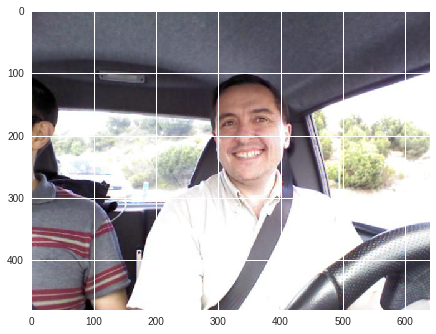

In [327]:
print(centroid)
centroid=()
distracted=0

image_paths= getImagesFromFolder("CarInsideImages/DrivFace/DrivImages")
generate_all_windows(loadImages(image_paths[200]),24, 0.2)

dashCamImage= loadImages(image_paths[0])
# plt.imshow(dashCamImage)

resImage=Detect(dashCamImage)
plt.imshow(resImage)